In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_csv('source/FReDA.csv')

In [3]:
# Variables to map columns
# New values are assigned as "in-between" values to ease plotting and calculations
index_options = {
    '0x': 0,
    '1-5x': 1,
    '6-10x': 2,
    '11-20x': 3,
    '21-50x': 4,
    '> 50x': 5
}

omo_options = {
    'Not at all': 0,
    '1 to 5 times': 1,
    '6 to 10 times': 2,
    '11 to 20 times': 3,
    '21 to 50 times': 4,
    'More than 50 times': 5
}

satisfaction_options = {
    '0 - Not at all satisfied': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10 - Completely satisfied': 10
}

duration_options = {
    '0-2': 1,
    '3-5': 2,
    '6-10': 3,
    '11-20': 4,
    '21+': 5,
}

In [6]:
rename_columns = {
    'omo15i1_w2b': 'Anchor kiss (E)',
    'omo15i2_w2b': 'Anchor kiss (D)',
    'pomo15i1_w2b': 'Partner kiss (E)',
    'pomo15i2_w2b': 'Partner kiss (D)',
    'omo16i1_w2b': 'Anchor hold (E)',
    'omo16i2_w2b': 'Anchor hold (D)',
    'pomo16i1_w2b': 'Partner hold (E)',
    'pomo16i2_w2b': 'Partner hold (D)',
    'omo17i1_w2b': 'Anchor intimacy (E)',
    'omo17i2_w2b': 'Anchor intimacy (D)',
    'pomo17i1_w2b': 'Partner intimacy (E)',
    'pomo17i2_w2b': 'Partner intimacy (D)',
    'relsat': 'Anchor relationship satisfaction',
    'relint': 'Anchor communication quality',
    'lifsat': 'Anchor life satisfaction',
    'prelsat': 'Partner relationship satisfaction',
    'prelint': 'Partner communication quality',
    'plifsat': 'Partner life satisfaction',
    'agediff_class': 'Age difference',
    'nkidsliv_class': 'Kids'
}

# Rename some columns to ease understanding
df = df.rename(
    columns=rename_columns
)

"The three scales "Intimacy" [Intimität], "Apreciation" [Wertschätzung], and "Conflict" [Konflikt] were adapted from the "Network of Relationships Inventory (NRI)" (Furman & Buhrmester, 1985) and used in an abbreviated form and adapted by pairfam and Freda (Hank et al. 2024)."

(more detailed: In contrast to the original version of the NRI, the questions in this version were asked only concerning the relationship with the partner, and not to any other persons with whom the respondent has a relationship. Furthermore, to limit the volume of data collected, the individual scales have been shortened from three to two items each. The response format has five stages, as did the original, but in this version they reflect frequency (1=Never to 5=Very frequently).)

In [7]:
# Create columns for speed
df['age-group (Anchor)'] = None
df['age-group (Partner)'] = None

# Map target columns
# This will change categorical values such as '0-2' or '3-5' to numerical values: 1,2,3,etc...
df['Anchor relationship satisfaction'] = df['Anchor relationship satisfaction'].map(satisfaction_options)
df['Partner relationship satisfaction'] = df['Partner relationship satisfaction'].map(satisfaction_options)
df['Anchor life satisfaction'] = df['Anchor life satisfaction'].map(satisfaction_options)
df['Partner life satisfaction'] = df['Partner life satisfaction'].map(satisfaction_options)

df['Anchor kiss (E)'] = df['Anchor kiss (E)'].map(omo_options)
df['Anchor hold (E)'] = df['Anchor hold (E)'].map(omo_options)
df['Anchor intimacy (E)'] = df['Anchor intimacy (E)'].map(omo_options)
df['Anchor kiss (D)'] = df['Anchor kiss (D)'].map(omo_options)
df['Anchor hold (D)'] = df['Anchor hold (D)'].map(omo_options)
df['Anchor intimacy (D)'] = df['Anchor intimacy (D)'].map(omo_options)

df['Partner kiss (E)'] = df['Partner kiss (E)'].map(omo_options)
df['Partner hold (E)'] = df['Partner hold (E)'].map(omo_options)
df['Partner intimacy (E)'] = df['Partner intimacy (E)'].map(omo_options)
df['Partner kiss (D)'] = df['Partner kiss (D)'].map(omo_options)
df['Partner hold (D)'] = df['Partner hold (D)'].map(omo_options)
df['Partner intimacy (D)'] = df['Partner intimacy (D)'].map(omo_options)

df['Relationship length'] = df['reldur_class'].map(duration_options)


In [8]:
# delete those with no relationship duration data
df = df[df['reldur_class'] != '.']
df = df.dropna(subset=["reldur_class"]).reset_index(drop=True)

In [168]:
# Group anchor and partner by age
for i in range(0, len(df)):
    if df['age'][i] <= 20:
        df.loc[i, 'age-group (Anchor)'] = 1
    elif 20 < df['age'][i] <= 30:
        df.loc[i, 'age-group (Anchor)'] = 2
    elif 30 < df['age'][i] <= 40:
        df.loc[i, 'age-group (Anchor)'] = 3
    elif 40 < df['age'][i] <= 50:
        df.loc[i, 'age-group (Anchor)'] = 4
    elif 50 < df['age'][i]:
        df.loc[i, 'age-group (Anchor)'] = 5

for i in range(0, len(df)):
    if df['page'][i] <= 20:
        df.loc[i, 'age-group (Partner)'] = 1
    elif 20 < df['age'][i] <= 30:
        df.loc[i, 'age-group (Partner)'] = 2
    elif 30 < df['age'][i] <= 40:
        df.loc[i, 'age-group (Partner)'] = 3
    elif 40 < df['age'][i] <= 50:
        df.loc[i, 'age-group (Partner)'] = 4
    elif 50 < df['age'][i]:
        df.loc[i, 'age-group (Partner)'] = 5

<Axes: xlabel='age-group(Anchor)', ylabel='Anchor kiss (E)'>

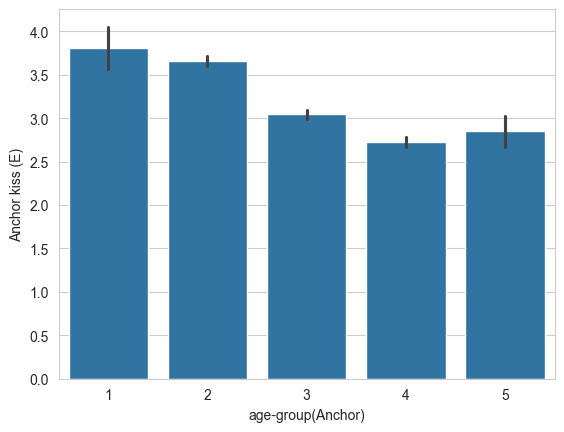

In [169]:
sns.barplot(data=df, x='age-group(Anchor)', y='Anchor kiss (E)',
            #order=["<21", "21-30", "31-40", "41-50", ">50"]
            )

<Axes: xlabel='Relationship length', ylabel='Anchor kiss (D)'>

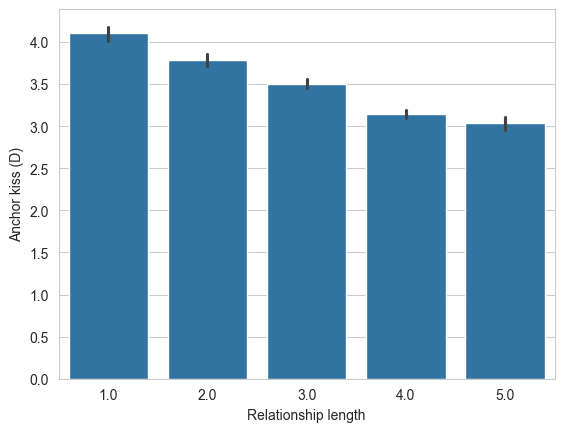

In [170]:
sns.barplot(df,
            x="Relationship length",
            y='Anchor kiss (D)'
            )


Compare Anchor and Partner. 
Find if there is any discrepancy between the reported frequency (kiss, pat, hug)
1. Anchor reported - Anchor desire
2. Partner reported - Partner desire

In [9]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor touch index (E)'] = np.mean(
        [df['Anchor kiss (E)'][i], df['Anchor hold (E)'][i], df['Anchor intimacy (E)'][i]])
    df.loc[i, 'Partner touch index (E)'] = np.mean(
        [df['Partner kiss (E)'][i], df['Partner hold (E)'][i], df['Partner intimacy (E)'][i]])

    df.loc[i, 'Anchor touch index (D)'] = np.mean(
        [df['Anchor kiss (D)'][i], df['Anchor hold (D)'][i], df['Anchor intimacy (D)'][i]])
    df.loc[i, 'Partner touch index (D)'] = np.mean(
        [df['Partner kiss (D)'][i], df['Partner hold (D)'][i], df['Partner intimacy (D)'][i]])

    df.loc[i, 'Anchor kiss_discrepancy'] = abs(df['Anchor kiss (E)'][i] - df['Anchor kiss (D)'][i])
    df.loc[i, 'Anchor hold_discrepancy'] = abs(df['Anchor hold (E)'][i] - df['Anchor hold (D)'][i])
    df.loc[i, 'Anchor hug_discrepancy'] = abs(df['Anchor intimacy (E)'][i] - df['Anchor intimacy (D)'][i])

    df.loc[i, 'Partner kiss_discrepancy'] = abs(df['Partner kiss (E)'][i] - df['Partner kiss (D)'][i])
    df.loc[i, 'Partner hold_discrepancy'] = abs(df['Partner hold (E)'][i] - df['Partner hold (D)'][i])
    df.loc[i, 'Partner hug_discrepancy'] = abs(df['Partner intimacy (E)'][i] - df['Partner intimacy (D)'][i])

In [10]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor touch discrepancy'] = np.mean(
        [df['Anchor kiss_discrepancy'][i], df['Anchor hold_discrepancy'][i], df['Anchor hug_discrepancy'][i]])
    df.loc[i, 'Partner touch discrepancy'] = np.mean(
        [df['Partner kiss_discrepancy'][i], df['Partner hold_discrepancy'][i], df['Partner hug_discrepancy'][i]])

Start with some descriptive statistics, including a Correlation Matrix

<Axes: xlabel='Relationship length', ylabel='index'>

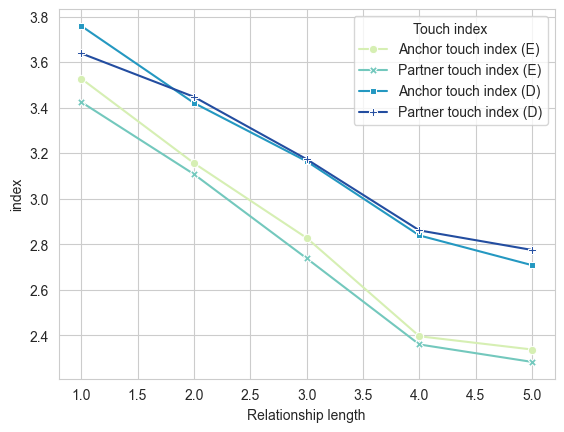

In [11]:
# Calculate means for touch variables
anchor_touch_E = df.groupby('Relationship length')['Anchor touch index (E)'].mean().reset_index()
anchor_touch_D = df.groupby('Relationship length')['Partner touch index (E)'].mean().reset_index()

partner_touch_E = df.groupby('Relationship length')['Anchor touch index (D)'].mean().reset_index()
partner_touch_D = df.groupby('Relationship length')['Partner touch index (D)'].mean().reset_index()

dfs = [anchor_touch_E, anchor_touch_D, partner_touch_E, partner_touch_D]

touch_indexes = reduce(lambda left, right: pd.merge(left, right, on=['Relationship length'],
                                                    how='outer'), dfs)

touch_indexes = touch_indexes.melt(id_vars='Relationship length',
                                   value_vars=['Anchor touch index (E)', 'Partner touch index (E)',
                                               'Anchor touch index (D)', 'Partner touch index (D)'],
                                   var_name='Touch index', value_name='index'
                                   )

sns.lineplot(data=touch_indexes,
             x='Relationship length',
             y='index',
             hue='Touch index',
             style='Touch index',
             palette='YlGnBu',
             markers=True, dashes=False

             )

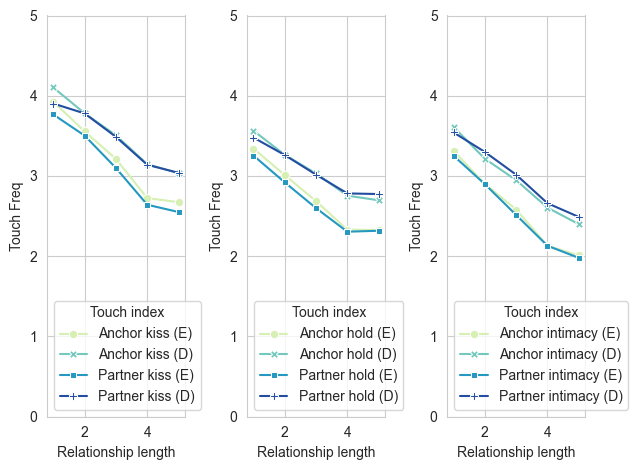

In [12]:
# Calculate means for touch variables
df_touch = df[[
    'age', 'page', 'Relationship length', 'Anchor kiss (E)',
    'Anchor hold (E)', 'Anchor intimacy (E)', 'Anchor kiss (D)', 'Anchor hold (D)',
    'Anchor intimacy (D)', 'Partner kiss (E)', 'Partner hold (E)', 'Partner intimacy (E)',
    'Partner kiss (D)', 'Partner hold (D)', 'Partner intimacy (D)'
]]

df_touch = df_touch.groupby('Relationship length').mean().reset_index()

kissing = df_touch.melt(id_vars='Relationship length',
                        value_vars=['Anchor kiss (E)', 'Anchor kiss (D)', 'Partner kiss (E)', 'Partner kiss (D)'],
                        var_name='Touch index', value_name='Touch Freq'
                        )
holding = df_touch.melt(id_vars='Relationship length',
                        value_vars=['Anchor hold (E)', 'Anchor hold (D)', 'Partner hold (E)', 'Partner hold (D)'],
                        var_name='Touch index', value_name='Touch Freq'
                        )
hugging = df_touch.melt(id_vars='Relationship length',
                        value_vars=['Anchor intimacy (E)', 'Anchor intimacy (D)', 'Partner intimacy (E)',
                                    'Partner intimacy (D)'],
                        var_name='Touch index', value_name='Touch Freq'
                        )

fig, ax = plt.subplots(1, 3)

sns.lineplot(
    data=kissing,
    x='Relationship length',
    y='Touch Freq',
    hue='Touch index',
    style='Touch index',
    palette='YlGnBu',
    markers=True, dashes=False,
    ax=ax[0]
)

sns.lineplot(
    data=holding,
    x='Relationship length',
    y='Touch Freq',
    hue='Touch index',
    style='Touch index',
    palette='YlGnBu',
    markers=True, dashes=False,
    ax=ax[1]
)

sns.lineplot(
    data=hugging,
    x='Relationship length',
    y='Touch Freq',
    hue='Touch index',
    style='Touch index',
    palette='YlGnBu',
    markers=True, dashes=False,
    ax=ax[2]
)
ax[0].set_ylim(0, 5)
ax[1].set_ylim(0, 5)
ax[2].set_ylim(0, 5)
fig.tight_layout()
#fig.set_dpi(300)
#

In [14]:
for i in range(0, len(df)):
    # --- Kiss --- #
    if df['Anchor kiss (E)'][i] == df['Partner kiss (E)'][i]:
        df.loc[i, "kiss_diff"] = 0

    if df['Anchor kiss (E)'][i] > df['Partner kiss (E)'][i]:
        df.loc[i, "kiss_diff"] = 1

    if df['Anchor kiss (E)'][i] < df['Partner kiss (E)'][i]:
        df.loc[i, "kiss_diff"] = -1

    if (df['Anchor kiss (E)'][i] > df['Partner kiss (E)'][i]) and (
            df['Anchor kiss (E)'][i] - df['Partner kiss (E)'][i]) > 2:
        df.loc[i, "kiss_diff"] = 2

    if (df['Anchor kiss (E)'][i] < df['Partner kiss (E)'][i]) and (
            df['Anchor kiss (E)'][i] - df['Partner kiss (E)'][i]) < -2:
        df.loc[i, "kiss_diff"] = -2

    # --- Hold --- #
    if df['Anchor hold (E)'][i] == df['Partner hold (E)'][i]:
        df.loc[i, "hold_diff"] = 0

    if df['Anchor hold (E)'][i] > df['Partner hold (E)'][i]:
        df.loc[i, "hold_diff"] = 1

    if df['Anchor hold (E)'][i] < df['Partner hold (E)'][i]:
        df.loc[i, "hold_diff"] = -1

    if (df['Anchor hold (E)'][i] > df['Partner hold (E)'][i]) and (
            df['Anchor hold (E)'][i] - df['Partner hold (E)'][i]) > 2:
        df.loc[i, "hold_diff"] = 2

    if (df['Anchor hold (E)'][i] < df['Partner hold (E)'][i]) and (
            df['Anchor hold (E)'][i] - df['Partner hold (E)'][i]) < -2:
        df.loc[i, "hold_diff"] = -2

    # --- Intimacy (Hug) --- #
    if df['Anchor intimacy (E)'][i] == df['Partner intimacy (E)'][i]:
        df.loc[i, "hug_diff"] = 0

    if df['Anchor intimacy (E)'][i] > df['Partner intimacy (E)'][i]:
        df.loc[i, "hug_diff"] = 1

    if df['Anchor intimacy (E)'][i] < df['Partner intimacy (E)'][i]:
        df.loc[i, "hug_diff"] = -1

    if (df['Anchor intimacy (E)'][i] > df['Partner intimacy (E)'][i]) and (
            df['Anchor intimacy (E)'][i] - df['Partner intimacy (E)'][i]) > 2:
        df.loc[i, "hug_diff"] = 2

    if (df['Anchor intimacy (E)'][i] < df['Partner intimacy (E)'][i]) and (
            df['Anchor intimacy (E)'][i] - df['Partner intimacy (E)'][i]) < -2:
        df.loc[i, "hug_diff"] = -2

    # --- Overall --- #
    if df['Anchor touch discrepancy'][i] == df['Partner touch discrepancy'][i]:
        df.loc[i, "overall_diff"] = 0

    if df['Anchor touch discrepancy'][i] > df['Partner touch discrepancy'][i]:
        df.loc[i, "overall_diff"] = 1

    if df['Anchor touch discrepancy'][i] < df['Partner touch discrepancy'][i]:
        df.loc[i, "overall_diff"] = -1

    if (df['Anchor touch discrepancy'][i] > df['Partner touch discrepancy'][i]) and (
            df['Anchor touch discrepancy'][i] - df['Partner touch discrepancy'][i]) > 2:
        df.loc[i, "overall_diff"] = 2

    if (df['Anchor touch discrepancy'][i] < df['Partner touch discrepancy'][i]) and (
            df['Anchor touch discrepancy'][i] - df['Partner touch discrepancy'][i]) < -2:
        df.loc[i, "overall_diff"] = -2


Text(0.5, 0, 'Kiss difference')

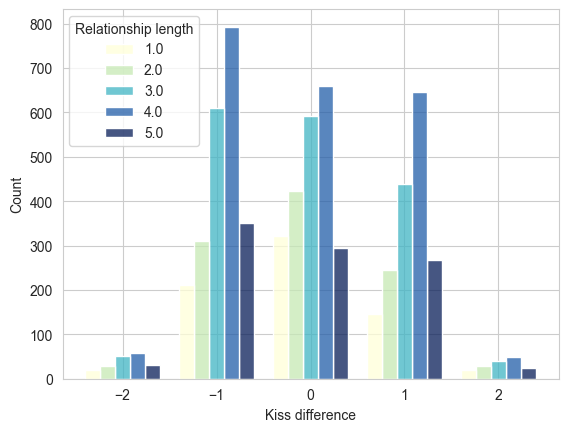

In [19]:
fig, ax = plt.subplots()
sns.histplot(
    data=df,
    x="overall_diff",
    hue="Relationship length",
    multiple="dodge",
    discrete=True,
    shrink=.8,
    palette='YlGnBu'
)
ax.set_xlabel("Kiss difference")

<Axes: xlabel='Anchor relationship satisfaction', ylabel='Count'>

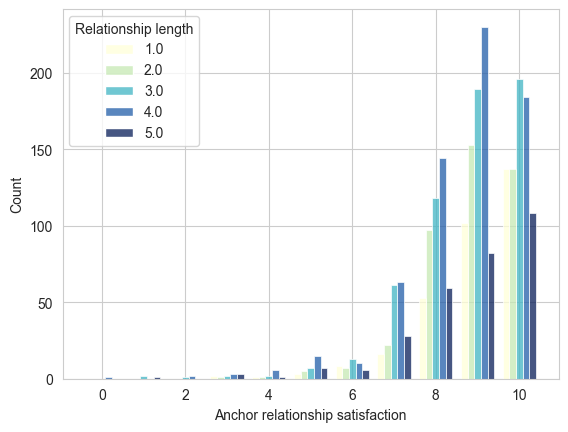

In [16]:
df_kiss = df[df["kiss_diff"] == 0]
df_hold = df[df["hold_diff"] == 0]
df_hug = df[df["hug_diff"] == 0]
df_overall = df[df["overall_diff"] == 0]

sns.histplot(
    data=df_overall,
    x="Anchor relationship satisfaction",
    hue="Relationship length",
    multiple="dodge",
    discrete=True,
    shrink=.8,
    palette='YlGnBu'
)

<Axes: xlabel='Anchor relationship satisfaction', ylabel='Count'>

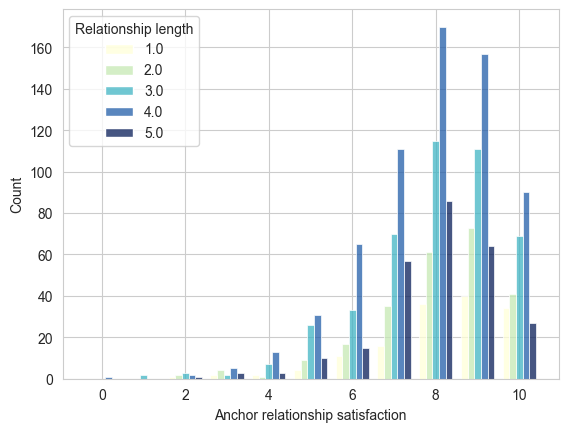

In [17]:
df_overall = df[df["overall_diff"] == 1]

sns.histplot(
    data=df_overall,
    x="Anchor relationship satisfaction",
    hue="Relationship length",
    multiple="dodge",
    discrete=True,
    shrink=.8,
    palette='YlGnBu'
)

<Axes: xlabel='Anchor relationship satisfaction', ylabel='Count'>

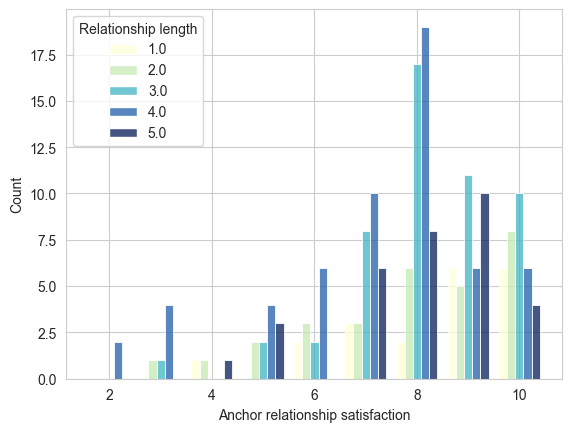

In [18]:
df_overall = df[df["overall_diff"] == -2]

sns.histplot(
    data=df_overall,
    x="Anchor relationship satisfaction",
    hue="Relationship length",
    multiple="dodge",
    discrete=True,
    shrink=.8,
    palette='YlGnBu'
)

<Axes: xlabel='Relationship length', ylabel='frequency'>

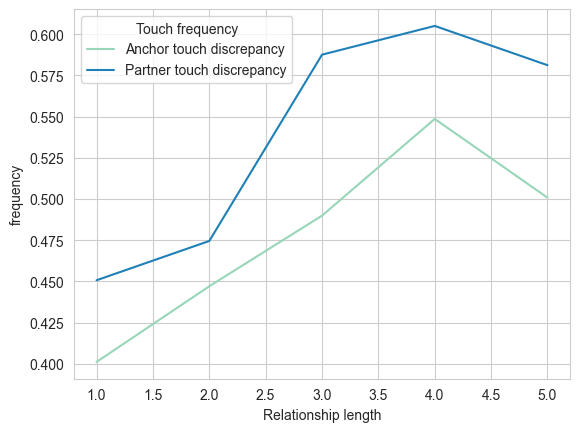

In [21]:
# df_touch = df[[
#     'age', 'page', 'Relationship length', 'Anchor kiss (E)',
#     'Anchor hold (E)', 'Anchor intimacy (E)', 'Anchor kiss (D)', 'Anchor hold (D)',
#     'Anchor intimacy (D)', 'Partner kiss (E)', 'Partner hold (E)', 'Partner intimacy (E)',
#     'Partner kiss (D)', 'Partner hold (D)', 'Partner intimacy (D)'
# ]]
#
# df_touch = df_touch.groupby('Relationship length').mean().reset_index()
#
# anchor_dis = df.groupby('Relationship length')['Anchor overall discrepancy'].mean().reset_index()
# partner_dis = df.groupby('Relationship length')['Partner overall discrepancy'].mean().reset_index()
#
# discrepancy = reduce(lambda left, right: pd.merge(left, right, on=['Relationship length'],
#                                                   how='outer'), [anchor_dis, partner_dis])

discrepancy = df.groupby('Relationship length')[[
    'Anchor touch discrepancy', 'Partner touch discrepancy']].mean().reset_index()

discrepancy = discrepancy.melt(
    id_vars='Relationship length',
    value_vars=['Anchor touch discrepancy', 'Partner touch discrepancy'],
    var_name='Touch frequency',
    value_name='frequency'
)

sns.lineplot(data=discrepancy,
             x='Relationship length',
             y='frequency',
             hue='Touch frequency',
             palette='YlGnBu'
             )


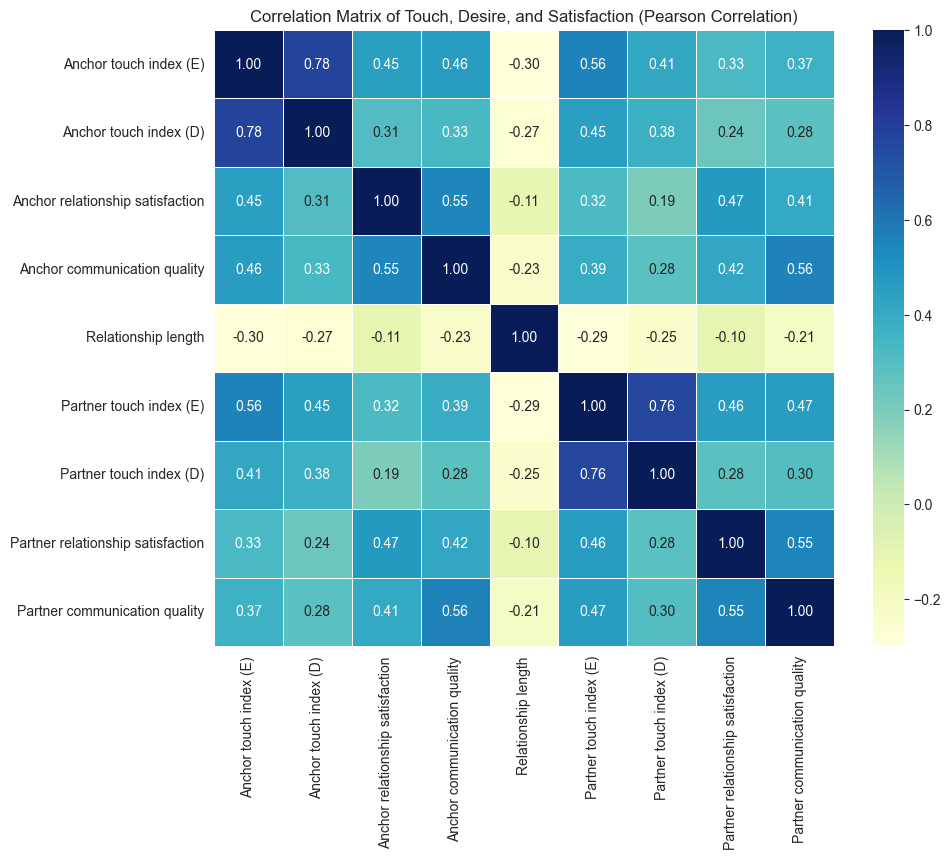

In [22]:
correlation_all = df[
    [
        'Anchor touch index (E)', 'Anchor touch index (D)',
        'Anchor relationship satisfaction', 'Anchor communication quality', 'Relationship length',
        'Partner touch index (E)', 'Partner touch index (D)',
        'Partner relationship satisfaction', 'Partner communication quality',

    ]
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_all, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
plt.show()

Following "User's guide to correlation coefficients" (https://pmc.ncbi.nlm.nih.gov/articles/PMC6107969/)

1. There is a Strong correlation between touch experienced and touch desired for both Anchor (0.82) and Partner (0.81)
2. There is a Moderate correlation for communication quality between anchor and partner (0,56)
3. There is a Moderate correlation for experienced touch between anchor and partner (0.54)
4. There is a Moderate correlation between partner relationship satisfaction and communication quality (0,46)
5. There is a Moderate correlation between partner experienced touch and anchor desired touch (0,45)
6. There is a Moderate correlation between anchor experienced touch and partner desired touch (0,43)
7. There is a Moderate correlation between touch experienced and perceived communication quality within the relationship for the anchor (0.43)
8. There is a Moderate correlation between anchor desired touch and partner desired touch (0,40)

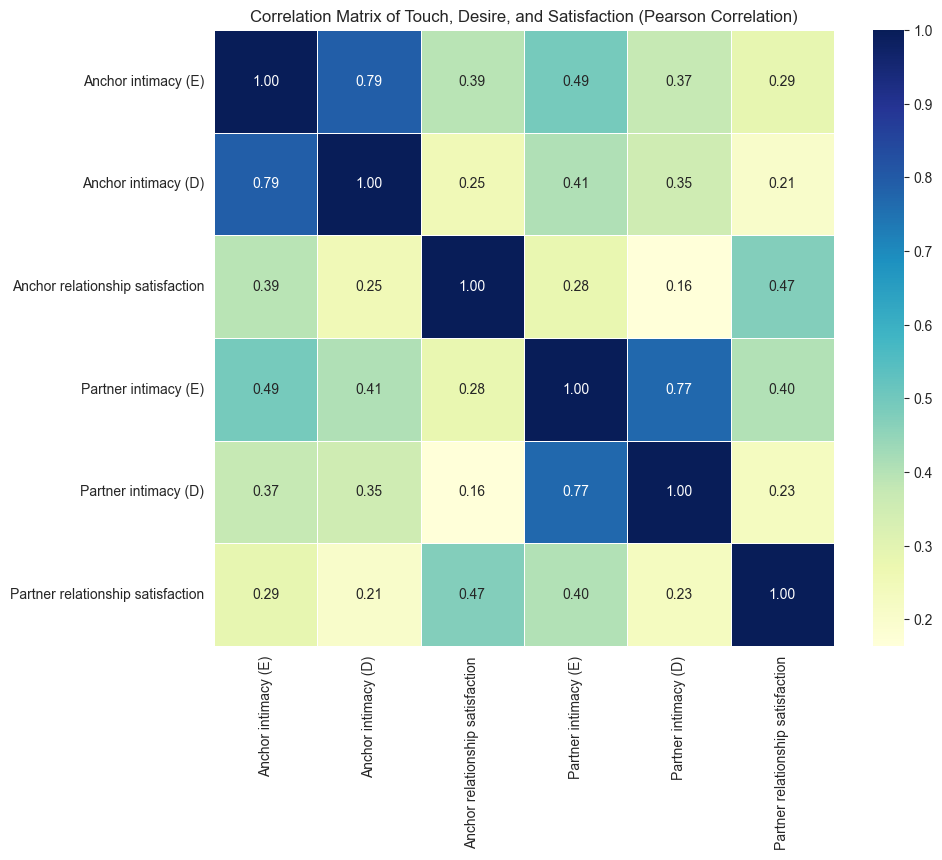

In [23]:
correlation_matrix = df[
    [
        'Anchor intimacy (E)', 'Anchor intimacy (D)',
        'Anchor relationship satisfaction',
        'Partner intimacy (E)', 'Partner intimacy (D)',
        'Partner relationship satisfaction',
    ]
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
plt.show()